# Image To Pencil and WaterColor Sketch

## Converting To Pencil Sketch

Converting an image to a pencil sketch using OpenCV typically involves a series of image processing steps. The principle behind this transformation is to simulate the effect of a pencil sketch by enhancing the edges and reducing the color information in the image. Here are the main steps involved:

1. **Load the Image**: Load the color image that you want to convert into a pencil sketch using OpenCV.

2. **Convert to Grayscale**: Convert the color image to grayscale. This simplifies the image to a single channel, making it easier to work with the intensity (brightness) of pixels.

3. **Invert the Grayscale Image**: Invert the grayscale image by subtracting each pixel's intensity from the maximum intensity value (usually 255). This step effectively reverses the colors, making dark areas light and vice versa.

4. **Apply Gaussian Blur**: Apply Gaussian blur to the inverted grayscale image. This step smoothens the image and reduces noise while preserving edges.

5. **Blend the Original and Blurred Images**: Combine the original grayscale image and the blurred image. This can be done using techniques like Dodge or the "Lighten" blend mode. The goal is to emphasize the edges and retain some of the original texture.

6. **Adjust the Intensity**: You can adjust the intensity of the pencil sketch effect by controlling the blending factor between the original and blurred images. A higher blending factor will result in a lighter sketch, while a lower factor will make it darker.

7. **Display or Save the Result**: Finally, you can display or save the resulting pencil sketch image.

Here's a simplified example in Python using OpenCV to convert an image to a pencil sketch:

```python
import cv2

# Load the image
image = cv2.imread('input_image.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Invert the grayscale image
inverted_image = 255 - gray_image

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)

# Blend the original and blurred images to create the pencil sketch effect
sketch = cv2.divide(255 - blurred_image, 255, scale=256)

# Display the sketch
cv2.imshow('Pencil Sketch', sketch)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

This code will load an image, apply the steps described above, and display the resulting pencil sketch. You can adjust the parameters and the blending factor to achieve the desired effect.

In [10]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('csm_header_01_ee491ab91f.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Invert the grayscale image
inverted_image = 255 - gray_image

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)

# Blend the original and blurred images to create the pencil sketch effect
sketch = cv2.divide(255 - blurred_image, 255, scale=256)
#sketch=cv2.pencilSketch(gray_image, sigma_s=50, sigma_r=0.07, shade_factor=0.0825)
# Display the sketch
cv2.imshow('Pencil Sketch', sketch)
#plt.imshow(sketch)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
def convert_to_pencilSketch(input_img):
    # pencilSketch() is used to apply pencil sketching effect
    img_pencil_sketch, pencil_color_sketch = cv2.pencilSketch(input_img, sigma_s=50, sigma_r=0.07, shade_factor=0.0825)
    return(img_pencil_sketch) #  return the pencil sketch

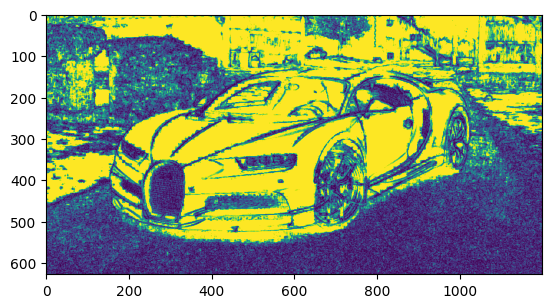

In [8]:
image=convert_to_pencilSketch(image)
plt.imshow(image)

## Converting To Water Color Sketch

Converting an image to a watercolor sketch effect using OpenCV involves a series of image processing steps that aim to simulate the appearance of a watercolor painting. The principle behind this transformation is to create an effect that resembles the way watercolors blend colors and create soft edges. Here are the main steps involved:

1. **Load the Image**: Load the color image that you want to convert into a watercolor sketch using OpenCV.

2. **Convert to Grayscale**: Convert the color image to grayscale. This simplifies the image to a single channel, which is a common step in many artistic effects to work with the intensity (brightness) of pixels.

3. **Apply Bilateral Filter**: Apply a bilateral filter to the grayscale image. The bilateral filter preserves edges while smoothing the rest of the image. It helps create the characteristic soft transitions and blending seen in watercolor paintings. You can adjust the filter's parameters to control the effect's intensity.

4. **Apply Color Transfer**: To simulate the color blending effect of watercolors, you can transfer the color information from the original color image to the filtered grayscale image. This step involves mapping the colors from the original image to the grayscale image based on the intensity of the grayscale pixels. It creates the appearance of color blending.

5. **Adjust Saturation**: Optionally, you can adjust the saturation of the color-transferred image. Reducing the saturation can make the colors look more muted and watercolor-like.

6. **Display or Save the Result**: Finally, you can display or save the resulting watercolor sketch image.

Here's a simplified example in Python using OpenCV to convert an image to a watercolor sketch:

```python
import cv2

# Load the image
image = cv2.imread('input_image.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter
bilateral_filtered_image = cv2.bilateralFilter(gray_image, d=9, sigmaColor=75, sigmaSpace=75)

# Apply color transfer
color_transferred_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
l_channel, a_channel, b_channel = cv2.split(color_transferred_image)
l_channel = bilateral_filtered_image
color_transferred_image = cv2.merge((l_channel, a_channel, b_channel))
color_transferred_image = cv2.cvtColor(color_transferred_image, cv2.COLOR_Lab2BGR)

# Adjust saturation (optional)
# color_transferred_image = cv2.convertScaleAbs(color_transferred_image, alpha=0.8, beta=20)

# Display the watercolor sketch
cv2.imshow('Watercolor Sketch', color_transferred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

This code will load an image, apply the steps described above, and display the resulting watercolor sketch effect. You can adjust the parameters of the bilateral filter and the color transfer to control the appearance of the effect.

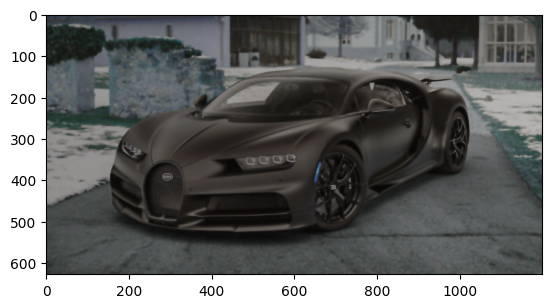

In [6]:
import cv2

# Load the image
image = cv2.imread('csm_header_01_ee491ab91f.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter
bilateral_filtered_image = cv2.bilateralFilter(gray_image, d=9, sigmaColor=75, sigmaSpace=75)

# Apply color transfer
color_transferred_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
l_channel, a_channel, b_channel = cv2.split(color_transferred_image)
l_channel = bilateral_filtered_image
color_transferred_image = cv2.merge((l_channel, a_channel, b_channel))
color_transferred_image = cv2.cvtColor(color_transferred_image, cv2.COLOR_Lab2BGR)

# Adjust saturation (optional)
# color_transferred_image = cv2.convertScaleAbs(color_transferred_image, alpha=0.8, beta=20)

# Display the watercolor sketch
#cv2.imshow('Watercolor Sketch', color_transferred_image)
plt.imshow(color_transferred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:
# Write the function to convert an image to a water color sketch
def convert_to_waterColorSketch(input_img):
    #  edgePreservingFilter() is used to reduce noise in the image
    img_1 = cv2.edgePreservingFilter(input_img, flags=2, sigma_s=50, sigma_r=0.8) 
    # stylization() is used to apply water color sketching effect
    img_water_color = cv2.stylization(img_1, sigma_s=100, sigma_r=0.5)
    return(img_water_color) #  return the water color sketch


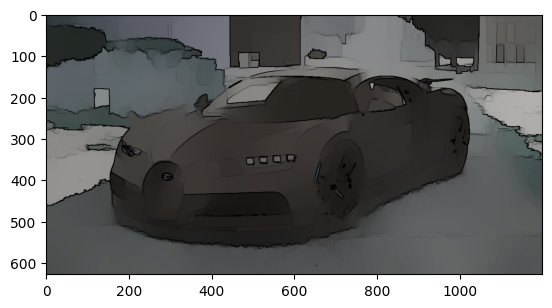

In [12]:
image2=convert_to_waterColorSketch(image)
plt.imshow(image2)

# Reference

[GeeksforGeeks](https://www.geeksforgeeks.org/build-gui-application-pencil-sketch-from-photo-in-python/)

# **Thank You**